In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt

c:\Users\vflip\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas_ta\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
def date_cutoff(data, start = None, end=None):
    if start:
        start = pd.to_datetime(start)
        if end:
            end = pd.to_datetime(end)
            return data[(data['Date'] >= start) & (data['Date'] < end)]
        else:
            return data[data['Date'] >= start]
    return data

In [58]:
cutoff1 = '1875-01-01'
cutoff2 = '2010-12-01'

In [59]:
df = pd.read_csv('./data/sp500-monthly-1871-2023.csv')
df["Date"] = pd.to_datetime(df['Date'])



data = date_cutoff(df, cutoff1, cutoff2)
#data['EMA']=ta.ema(data['SP500'])
data


# detect bearish periods

data['change'] = data['SP500'].pct_change()
bears = data[data['change']< -0.05] # change this to -0.1 or something
bears['Date']

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\1784698148.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['change'] = data['SP500'].pct_change()


68     1876-09-01
73     1877-02-01
74     1877-03-01
75     1877-04-01
77     1877-06-01
          ...    
1653   2008-10-01
1654   2008-11-01
1657   2009-02-01
1658   2009-03-01
1672   2010-05-01
Name: Date, Length: 114, dtype: datetime64[ns]

In [60]:
cli = pd.read_csv('./data/CLI-monthly-1947-2025.csv')
cli['Date'] = pd.to_datetime(cli['Date'])
cli = date_cutoff(cli, cutoff1, cutoff2)
cli

,Date,CLI
0,1947-02-01,102.30440
1,1947-03-01,101.91780
2,1947-04-01,101.54010
3,1947-05-01,101.18500
4,1947-06-01,100.87190
...,...,...
761,2010-07-01,99.55607
762,2010-08-01,99.65253
763,2010-09-01,99.71471
764,2010-10-01,99.73933


In [61]:
dgo = pd.read_csv('./data/durableGoodsOrders-monthly-1992-2025.csv')
dgo['Date'] = pd.to_datetime(dgo['Date'])
dgo = date_cutoff(dgo, cutoff1, cutoff2)
dgo

,Date,DGORDER
0,1992-02-01,114535
1,1992-03-01,120025
2,1992-04-01,124470
3,1992-05-01,125822
4,1992-06-01,122834
...,...,...
221,2010-07-01,187506
222,2010-08-01,191745
223,2010-09-01,201932
224,2010-10-01,193066


In [62]:
inflation = pd.read_csv('./data/inflation5y-daily-2003-2025.csv')
inflation['Date'] = pd.to_datetime(inflation['Date'])
inflation = date_cutoff(inflation, cutoff1, cutoff2)
inflation

,Date,Inflation 5Y
0,2003-01-02,1.98
1,2003-01-03,1.96
2,2003-01-06,1.95
3,2003-01-07,1.96
4,2003-01-08,2.09
...,...,...
2059,2010-11-24,2.67
2060,2010-11-25,NaN
2061,2010-11-26,2.64
2062,2010-11-29,2.64


In [63]:
sentiment = pd.read_csv('./data/sentiment-monthly-1952-2025.csv')
sentiment['Date'] = pd.to_datetime(sentiment['Date'])
sentiment = date_cutoff(sentiment, cutoff1, cutoff2)
sentiment

,Date,UMCSENT
0,1952-11-01,86.2
1,1952-12-01,NaN
2,1953-01-01,NaN
3,1953-02-01,90.7
4,1953-03-01,NaN
...,...,...
692,2010-07-01,67.8
693,2010-08-01,68.9
694,2010-09-01,68.2
695,2010-10-01,67.7


In [64]:
unemp = pd.read_csv('./data/unemployment-monthly-1948-2025.csv')
unemp['Date'] = pd.to_datetime(unemp['Date'])
unemp = date_cutoff(unemp, cutoff1, cutoff2)
unemp

,Date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
750,2010-07-01,9.4
751,2010-08-01,9.5
752,2010-09-01,9.5
753,2010-10-01,9.4


In [65]:
vix = pd.read_csv('./data/vix-monthly-1990-2024.csv')
vix['Date'] = pd.to_datetime(vix['Date'])
vix = date_cutoff(vix, cutoff1, cutoff2)
vix

,Date,VIX_Close,High,Low,Open,Volume
0,1990-01-01,25.360001,27.250000,17.240000,17.240000,0
1,1990-02-01,21.990000,24.870001,19.709999,24.870001,0
2,1990-03-01,19.730000,22.740000,17.620001,21.900000,0
3,1990-04-01,19.520000,24.160000,17.730000,22.840000,0
4,1990-05-01,17.370001,20.139999,16.719999,18.430000,0
...,...,...,...,...,...,...
246,2010-07-01,23.500000,37.580002,21.860001,34.410000,0
247,2010-08-01,26.049999,28.920000,21.360001,23.070000,0
248,2010-09-01,23.700001,25.129999,20.850000,25.129999,0
249,2010-10-01,21.200001,24.340000,17.900000,22.900000,0


In [66]:
interest = pd.read_csv('./data/interests-daily-1990-2024.csv')
interest['Date'] = pd.to_datetime(interest['Date'])
interest = date_cutoff(interest, cutoff1, cutoff2)
interest = interest.drop(columns=['1 Mo', '2 Mo', '4 Mo', '20 Yr'])
interest

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\3432630407.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  interest['Date'] = pd.to_datetime(interest['Date'])


,Date,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
3523,2010-11-30,0.17,0.21,0.27,0.45,0.72,1.47,2.16,2.81,4.12
3524,2010-11-29,0.18,0.21,0.28,0.52,0.77,1.51,2.19,2.84,4.16
3525,2010-11-26,0.16,0.21,0.28,0.51,0.78,1.53,2.21,2.87,4.21
3526,2010-11-24,0.16,0.20,0.28,0.53,0.81,1.56,2.24,2.93,4.29
3527,2010-11-23,0.15,0.20,0.26,0.45,0.69,1.40,2.08,2.77,4.18
...,...,...,...,...,...,...,...,...,...,...
8752,1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09
8753,1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06
8754,1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04
8755,1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04


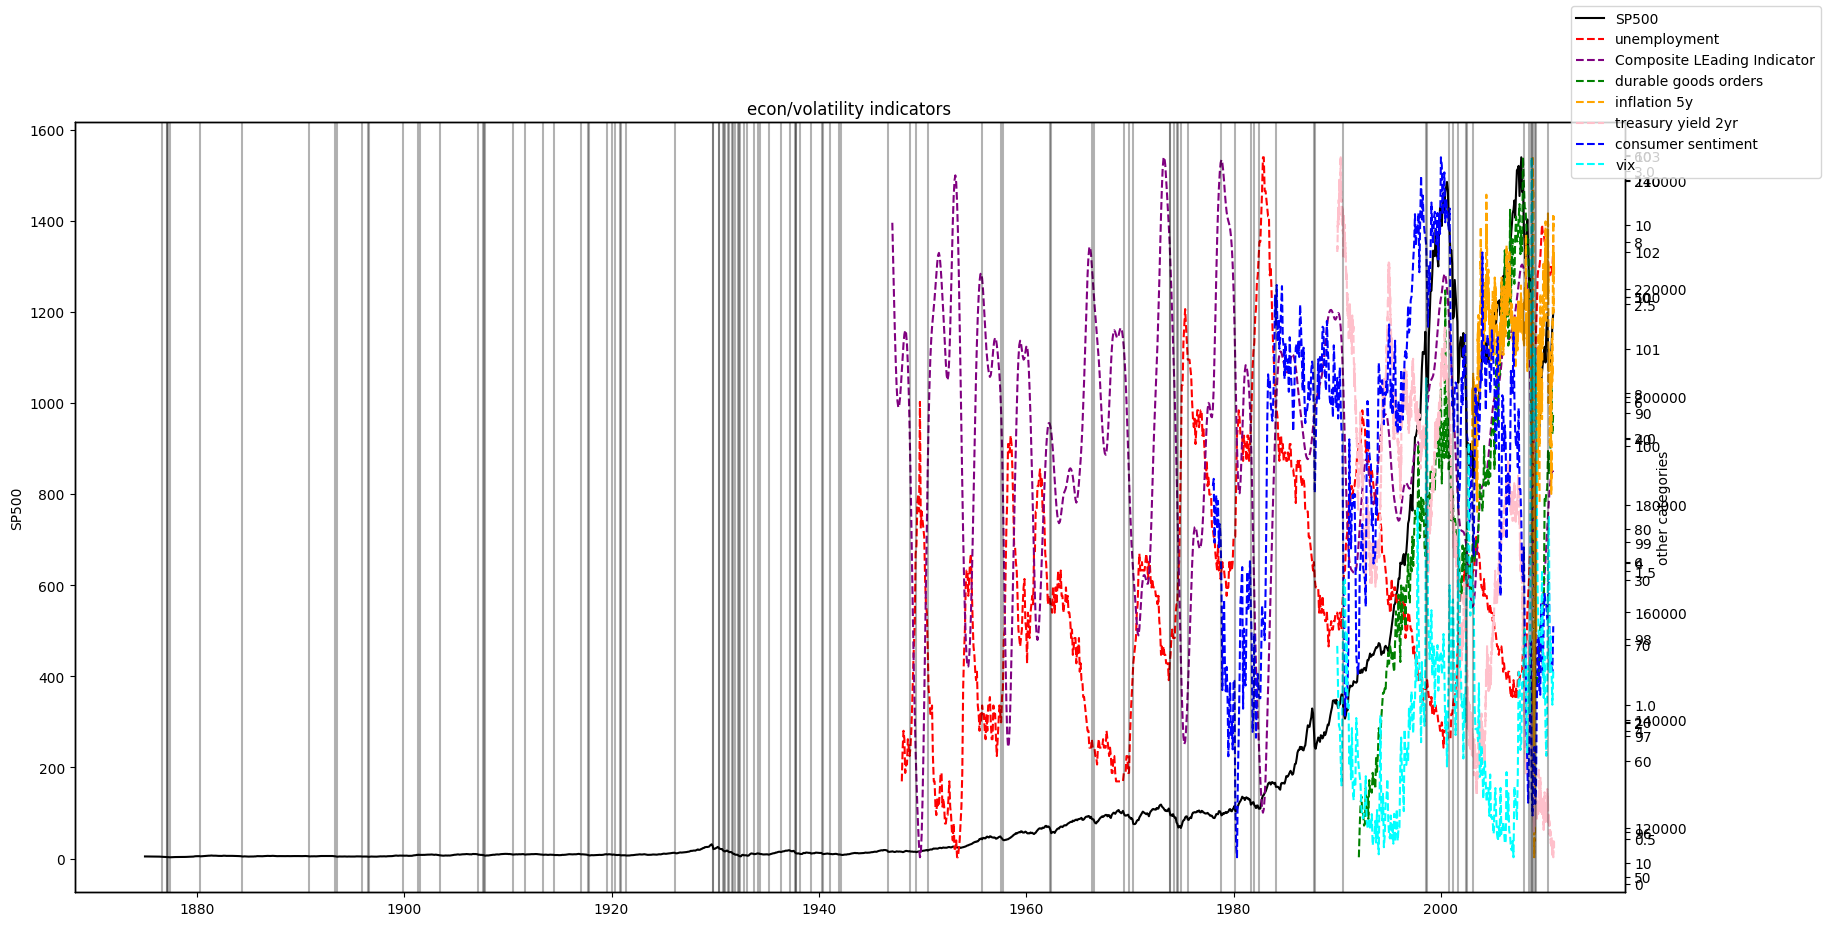

In [67]:
fig, ax = plt.subplots(figsize=(20,10))



ax.plot(data['Date'], data['SP500'], color="black", label = 'SP500')
ax.set_ylabel('SP500')




ax2 = ax.twinx()
ax2.plot(unemp['Date'], unemp['UNRATE'], color = "red", label = 'unemployment', linestyle='--')
ax2.set_ylabel('other categories')

ax3 = ax.twinx()
ax3.plot(cli['Date'], cli['CLI'], color = "purple", label = 'Composite LEading Indicator', linestyle='--')

ax4 = ax.twinx()
ax4.plot(dgo['Date'], dgo['DGORDER'], color = "green", label = 'durable goods orders', linestyle='--')

ax5 = ax.twinx()
ax5.plot(inflation['Date'], inflation['Inflation 5Y'], color = "orange", label = 'inflation 5y', linestyle='--')

ax6 = ax.twinx()
ax6.plot(interest['Date'], interest['2 Yr'], color = "pink", label = 'treasury yield 2yr', linestyle='--')

ax7 = ax.twinx()
ax7.plot(sentiment['Date'], sentiment['UMCSENT'], color = "blue", label = 'consumer sentiment', linestyle='--')

ax8 = ax.twinx()
ax8.plot(vix['Date'], vix['VIX_Close'], color = "cyan", label = 'vix', linestyle='--')

fig.legend()
plt.title('econ/volatility indicators')


for drop in bears['Date']:
    plt.axvline(drop, color = 'black', alpha = 0.3)

In [68]:
macro = data.merge(cli, on='Date', how='left')
macro = macro.merge(dgo, on='Date', how='left')
#macro = macro.merge(inflation, on='Date', how='left')
#macro = macro.merge(interest, on='Date', how='left')
macro = macro.merge(sentiment, on='Date', how='left')
macro = macro.merge(unemp, on='Date', how='left')
macro = macro.merge(vix[['Date', 'VIX_Close']], on='Date', how='left')

In [69]:
macro

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,change,CLI,DGORDER,UMCSENT,UNRATE,VIX_Close
0,1875-01-01,4.54,0.33,0.451700,11.51,5.07,120.72,8.71,12.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1875-02-01,4.53,0.32,0.443300,11.51,5.03,120.46,8.64,11.79,0.00,-0.002203,NaN,NaN,NaN,NaN,NaN
2,1875-03-01,4.59,0.32,0.435000,11.51,4.99,122.05,8.58,11.57,0.00,0.013245,NaN,NaN,NaN,NaN,NaN
3,1875-04-01,4.65,0.32,0.426700,11.61,4.95,122.63,8.44,11.25,0.00,0.013072,NaN,NaN,NaN,NaN,NaN
4,1875-05-01,4.47,0.32,0.418300,11.32,4.91,120.86,8.58,11.31,0.00,-0.038710,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,2010-07-01,1079.80,22.14,68.686667,218.01,3.01,1516.24,31.09,96.45,21.77,-0.003286,99.55607,187506.0,67.8,9.4,23.500000
1627,2010-08-01,1087.28,22.25,70.273333,218.31,2.70,1524.64,31.20,98.54,21.88,0.006927,99.65253,191745.0,68.9,9.5,26.049999
1628,2010-09-01,1122.08,22.35,71.860000,218.44,2.65,1572.52,31.32,100.71,22.55,0.032006,99.71471,201932.0,68.2,9.5,23.700001
1629,2010-10-01,1171.58,22.48,73.690000,218.71,2.54,1639.85,31.46,103.14,23.49,0.044115,99.73933,193066.0,67.7,9.4,21.200001


In [70]:
macro= macro.dropna()

In [71]:
macro.shape

(226, 16)

---TECHNICAL INDICATORS

In [72]:
df

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.440000,0.26,0.40,12.46,5.32,109.05,6.39,9.82,0.00
1,1871-02-01,4.500000,0.26,0.40,12.84,5.32,107.25,6.20,9.53,0.00
2,1871-03-01,4.610000,0.26,0.40,13.03,5.33,108.27,6.11,9.39,0.00
3,1871-04-01,4.740000,0.26,0.40,12.56,5.33,115.54,6.34,9.75,0.00
4,1871-05-01,4.860000,0.26,0.40,12.27,5.33,121.22,6.48,9.98,0.00
...,...,...,...,...,...,...,...,...,...,...
1828,2023-05-01,4146.173182,68.54,179.17,304.13,3.57,4173.45,68.99,180.35,31.14
1829,2023-06-01,4345.372857,68.71,181.17,305.11,3.75,4359.88,68.94,181.77,32.41
1830,2023-07-01,4508.075500,0.00,0.00,305.69,3.90,4514.51,0.00,0.00,33.38
1831,2023-08-01,4457.358696,0.00,0.00,305.98,4.17,4459.48,0.00,0.00,32.91


In [73]:
data = date_cutoff(df, cutoff1, cutoff2)
data['change'] = data['SP500'].pct_change()
bears = data[data['change']< -0.05] # change this to -0.1 or something

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\3267201302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['change'] = data['SP500'].pct_change()


In [74]:
data.shape

(1631, 11)

In [75]:

data['EMA'] = ta.ema(data['SP500'])
'''
data['SMA_50'] = ta.sma(data['SP500'], length=50)
data['SMA_200'] = ta.sma(data['SP500'], length=200)
'''
data['MACD'] = ta.macd(data['SP500'])['MACD_12_26_9']
data['MACD signal'] = ta.macd(data['SP500'])['MACDs_12_26_9']
data['MACD hist'] = ta.macd(data['SP500'])['MACDh_12_26_9']
data['RSI'] = ta.rsi(data['SP500'], length=14)
#data['ATR'] = ta.atr(data['SP500'], length=14)
data['bb_width'] = ta.bbands(data['SP500'])['BBB_5_2.0'] # → Bandwidth (BBU - BBL)
data['bb_percent'] = ta.bbands(data['SP500'])['BBP_5_2.0'] # → %B (Position of price within the band)

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\3274435561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EMA'] = ta.ema(data['SP500'])
C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\3274435561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MACD'] = ta.macd(data['SP500'])['MACD_12_26_9']
C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\3274435561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

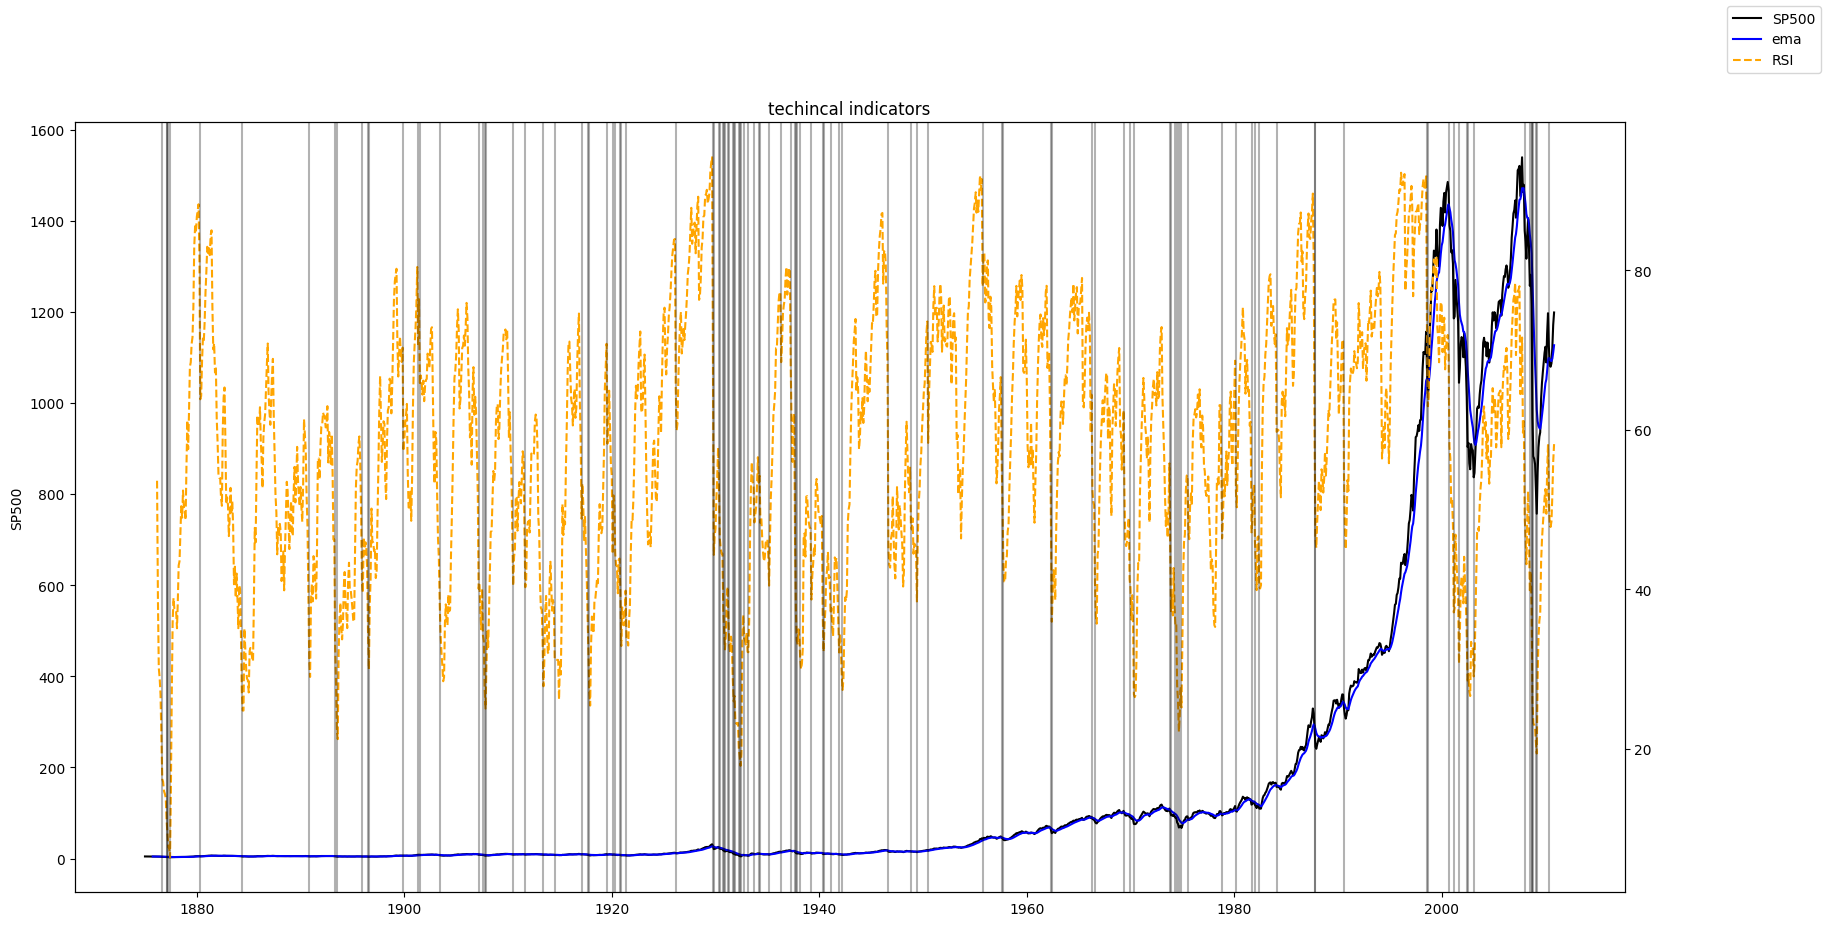

In [76]:
fig, ax = plt.subplots(figsize=(20,10))



ax.plot(data['Date'], data['SP500'], color="black", label = 'SP500')
ax.set_ylabel('SP500')

ax.plot(data['Date'], data['EMA'], color = 'blue',label='ema')

ax3 = ax.twinx()
ax3.plot(data['Date'], data['RSI'], color = "orange", label = 'RSI', linestyle='--')



'''

ax2 = ax.twinx()
ax2.plot(data['Date'], data['MACD'], color = "green", label = 'MACD', linestyle='--')
ax2.set_ylabel('other categories')


ax4 = ax.twinx()
ax4.plot(data['Date'], data['bb_width'], color = "pink", label = 'boolinger band width', linestyle='--')

ax5 = ax.twinx()
ax5.plot(data['Date'], data['bb_percent'], color = "purple", label = 'boolinger band %B', linestyle='--')
'''

fig.legend()
plt.title('techincal indicators')


for drop in bears['Date']:
    plt.axvline(drop, color = 'black', alpha = 0.3)

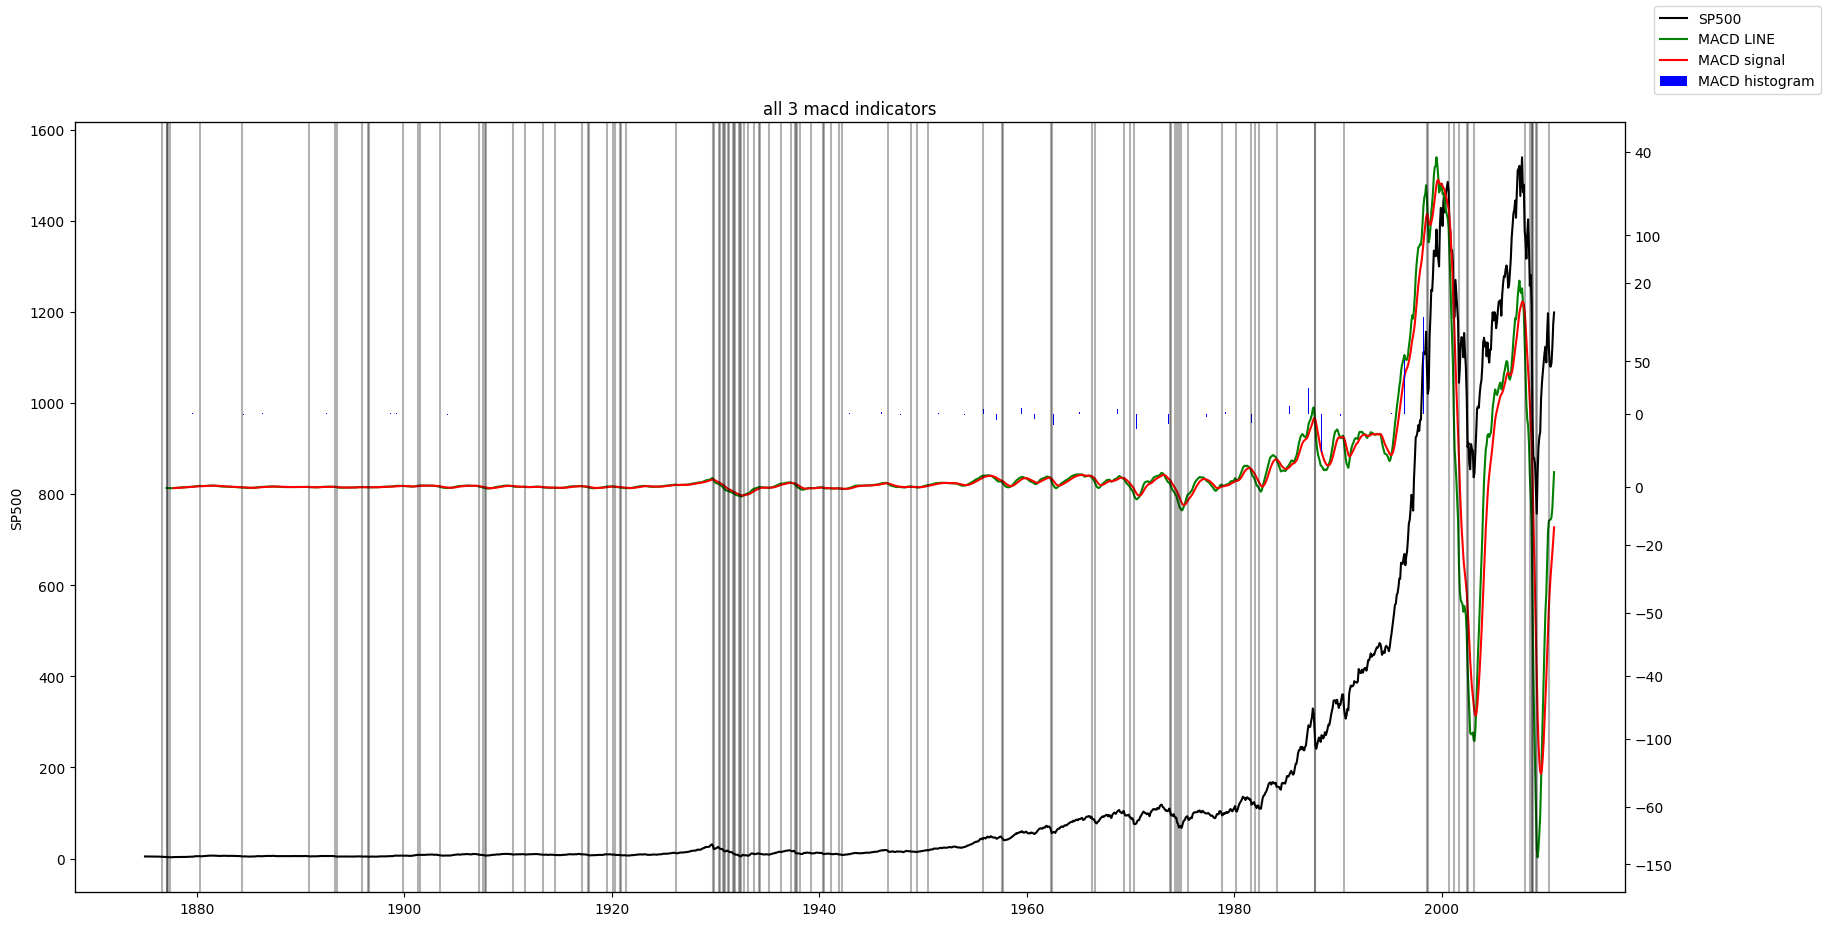

In [77]:
fig, ax = plt.subplots(figsize=(20,10))



ax.plot(data['Date'], data['SP500'], color="black", label = 'SP500')
ax.set_ylabel('SP500')

ax2 = ax.twinx()
ax2.plot(data['Date'], data['MACD'], color = 'green',label='MACD LINE')

ax2.plot(data['Date'], data['MACD signal'], color = "red", label = 'MACD signal')

ax4 = ax.twinx()
ax4.bar(data['Date'], data['MACD hist'], color = "blue", label = 'MACD histogram')

fig.legend()

plt.title('all 3 macd indicators')

for drop in bears['Date']:
    plt.axvline(drop, color = 'black', alpha = 0.3)

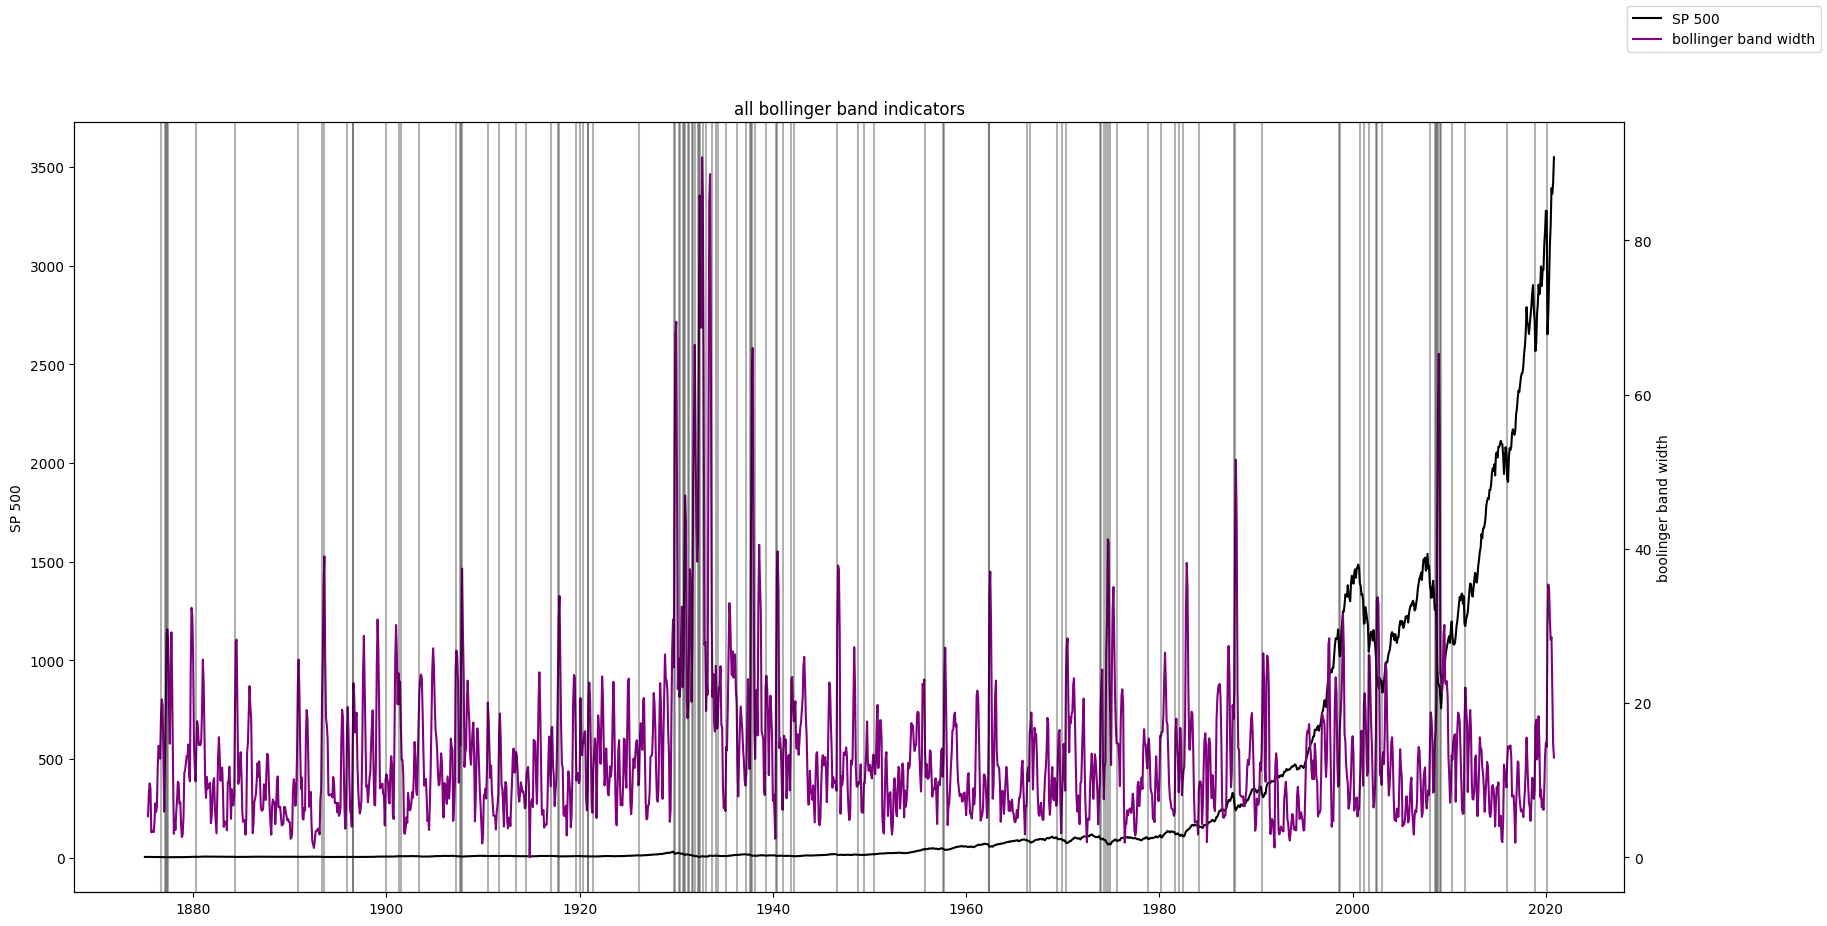

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(data['Date'], data['SP500'], color = "black", label = 'SP 500', linestyle='-')
ax.set_ylabel('SP 500')


ax2 = ax.twinx()
ax2.plot(data['Date'], data['bb_width'], color = "purple", label = 'bollinger band width', linestyle='-')
ax2.set_ylabel('boolinger band width')

'''
ax3 = ax.twinx()
ax3.plot(data['Date'], data['bb_percent'], color = "cyan", label = 'bollinger band %B', linestyle='-')
'''

fig.legend()
plt.title('all bollinger band indicators')

for drop in bears['Date']:
    plt.axvline(drop, color = 'black', alpha = 0.3)

In [78]:
data['RSI prediction'] = [1 if i < 30 else -1 if i > 70 else 0 for i in data['RSI']]

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\4265196701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI prediction'] = [1 if i < 30 else -1 if i > 70 else 0 for i in data['RSI']]


In [79]:
# Bullish crossover (MACD crosses above signal)
data['macd_cross_up'] = (data['MACD'] > data['MACD signal']) & (data['MACD'].shift(1) <= data['MACD signal'].shift(1))

# Bearish crossover
data['macd_cross_down'] = (data['MACD'] < data['MACD signal']) & (data['MACD'].shift(1) >= data['MACD signal'].shift(1))


C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\4148336786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_cross_up'] = (data['MACD'] > data['MACD signal']) & (data['MACD'].shift(1) <= data['MACD signal'].shift(1))
C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\4148336786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_cross_down'] = (data['MACD'] < data['MACD signal']) & (data['MACD'].shift(1) >= data['MACD signal'].shift(1))


"\nfor drop in bears['Date']:\n    plt.axvline(drop, color = 'black', alpha = 0.3)\n"

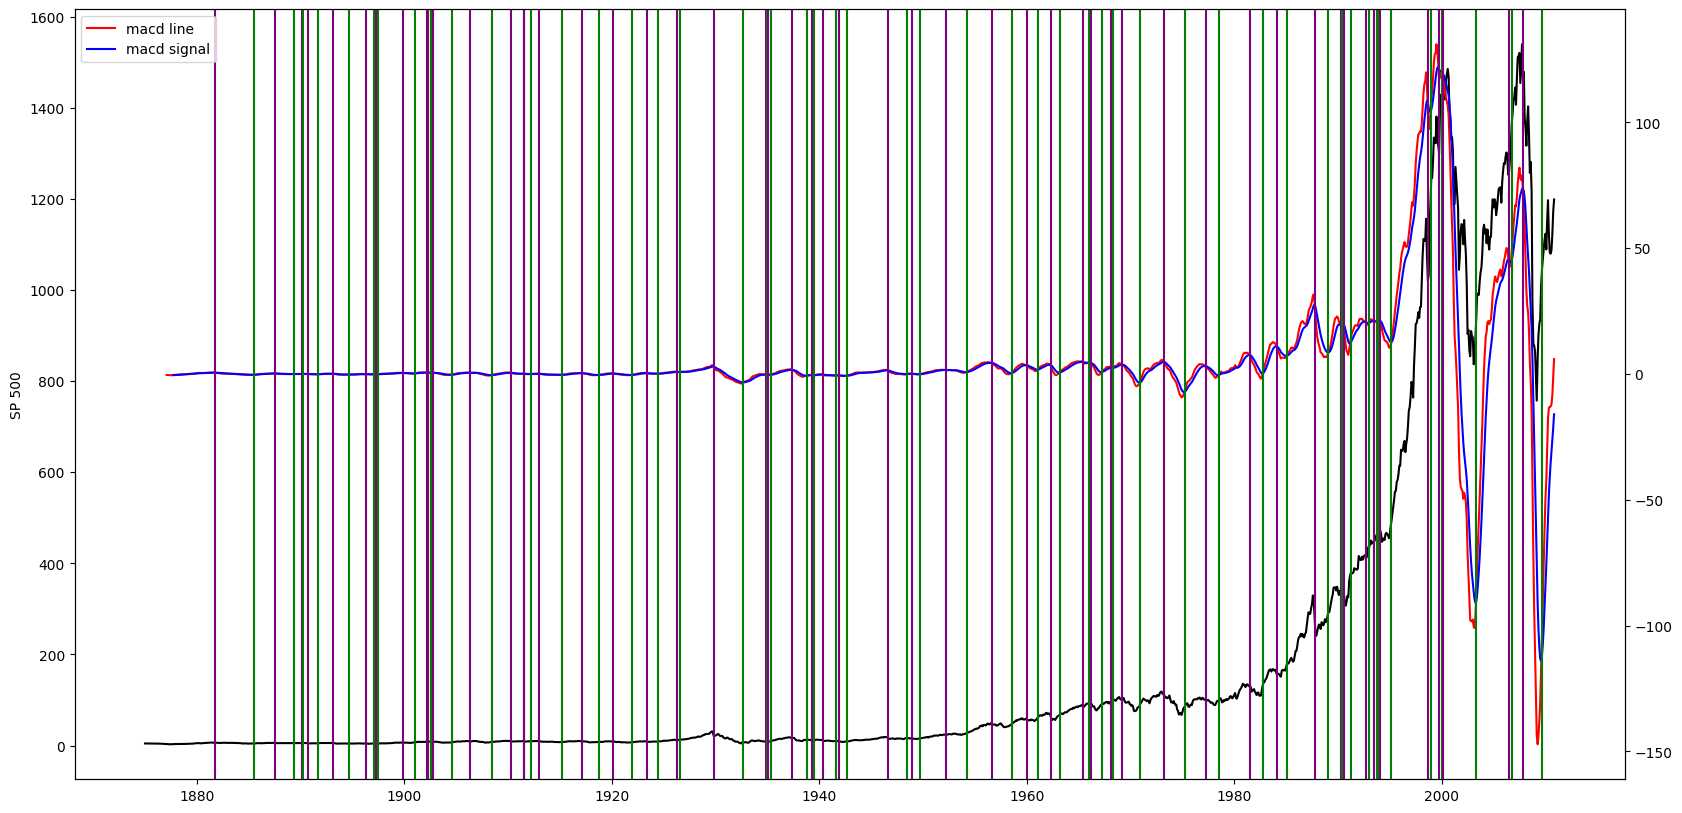

In [80]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(data['Date'], data['SP500'], color = "black", label = 'SP 500', linestyle='-')
ax.set_ylabel('SP 500')


ax2 = ax.twinx()
ax2.plot(data['Date'], data['MACD'], color = "red", label = 'macd line', linestyle='-')
ax2.plot(data['Date'], data['MACD signal'], color = "blue", label = 'macd signal', linestyle='-')

for _, row in data.iterrows():
    if row['macd_cross_up'] == 1:
        plt.axvline(row['Date'], color='green')
    elif row['macd_cross_down'] == 1:
        plt.axvline(row['Date'], color='purple')

plt.legend()

'''
for drop in bears['Date']:
    plt.axvline(drop, color = 'black', alpha = 0.3)
'''

In [81]:
data['macd prediction'] = 0
data.loc[data['macd_cross_up'], 'macd prediction'] = 1
data.loc[data['macd_cross_down'], 'macd prediction'] = -1

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\4074504271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd prediction'] = 0


In [82]:
data['next month'] = data['change'].shift(-1)

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\501727350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next month'] = data['change'].shift(-1)


In [83]:
data['next dir'] = [1 if i>0 else -1 for i in data['next month']]

C:\Users\vflip\AppData\Local\Temp\ipykernel_17232\1582051895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next dir'] = [1 if i>0 else -1 for i in data['next month']]


In [84]:
data = data.drop(columns=['SP500', 'Dividend', 'Earnings', 'Consumer Price Index',
       'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings',
       'PE10', 'change' ])

In [85]:
data = data.merge(macro, on='Date', how='left')

In [86]:
data = data.dropna()

In [87]:
data

,Date,EMA,MACD,MACD signal,MACD hist,RSI,bb_width,bb_percent,RSI prediction,macd_cross_up,...,Real Price,Real Dividend,Real Earnings,PE10,change,CLI,DGORDER,UMCSENT,UNRATE,VIX_Close
1405,1992-02-01,390.082375,21.887740,19.084791,2.802949,73.531598,13.473077,0.771719,-1,False,...,911.23,27.12,35.61,23.06,-0.008460,99.01931,114535.0,68.8,7.4,16.680000
1406,1992-03-01,393.223761,21.955744,19.658982,2.296762,70.076042,12.417224,0.605632,-1,False,...,895.22,27.07,35.58,22.70,-0.012604,99.15117,120025.0,76.0,7.4,16.180000
1407,1992-04-01,395.803077,21.762803,20.079746,1.683058,70.090597,9.375497,0.526929,-1,False,...,894.05,27.04,36.17,22.71,0.000123,99.28545,124470.0,77.2,7.4,15.530000
1408,1992-05-01,399.258882,21.953944,20.454586,1.499358,72.242445,3.552277,0.716512,-1,False,...,908.98,27.00,36.74,23.13,0.018164,99.41605,125822.0,79.2,7.6,13.860000
1409,1992-06-01,400.897267,21.331801,20.630029,0.701772,67.612642,2.969066,0.351178,0,False,...,891.46,26.90,37.23,22.72,-0.015766,99.53831,122834.0,80.4,7.8,13.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,2010-06-01,1096.224044,-13.092688,-41.323360,28.230672,48.108447,14.929094,0.226999,0,False,...,1521.56,30.95,94.24,21.86,-0.037065,99.43206,185667.0,76.0,9.4,34.540001
1626,2010-07-01,1093.237854,-12.952300,-35.649148,22.696848,47.818922,15.631355,0.229254,0,False,...,1516.24,31.09,96.45,21.77,-0.003286,99.55607,187506.0,67.8,9.4,23.500000
1627,2010-08-01,1092.154608,-12.098010,-30.938920,18.840910,48.519956,15.957553,0.346596,0,False,...,1524.64,31.20,98.54,21.88,0.006927,99.65253,191745.0,68.9,9.5,26.049999
1628,2010-09-01,1097.595588,-8.514757,-26.454088,17.939331,51.766611,7.204798,0.784835,0,False,...,1572.52,31.32,100.71,22.55,0.032006,99.71471,201932.0,68.2,9.5,23.700001


In [88]:
data.corr()

,Date,EMA,MACD,MACD signal,MACD hist,RSI,bb_width,bb_percent,RSI prediction,macd_cross_up,...,Real Price,Real Dividend,Real Earnings,PE10,change,CLI,DGORDER,UMCSENT,UNRATE,VIX_Close
Date,1.000000,0.756369,-0.344631,-0.342780,-0.080649,-0.564414,0.289914,-0.215861,0.567218,-0.075766,...,0.445183,0.750689,0.365555,-0.215625,-0.105849,0.068719,0.698641,-0.452464,0.198859,0.354284
EMA,0.756369,1.000000,0.159324,0.230411,-0.176394,-0.340344,0.173358,-0.289647,0.325129,-0.092146,...,0.889944,0.625302,0.570256,0.393112,-0.164517,0.512762,0.855965,0.030589,-0.380692,0.353984
MACD,-0.344631,0.159324,1.000000,0.949708,0.367439,0.776568,-0.368046,0.173615,-0.642171,-0.018443,...,0.484927,-0.009147,0.592773,0.757288,0.083333,0.775650,0.313665,0.665995,-0.684164,-0.276694
MACD signal,-0.342780,0.230411,0.949708,1.000000,0.057729,0.632017,-0.236599,0.023365,-0.540901,-0.029355,...,0.508526,0.060889,0.482203,0.763793,-0.012319,0.798131,0.307301,0.599106,-0.751849,-0.118855
MACD hist,-0.080649,-0.176394,0.367439,0.057729,1.000000,0.598676,-0.470673,0.484119,-0.440819,0.028388,...,0.035655,-0.210008,0.457668,0.145818,0.302269,0.102371,0.087302,0.343900,0.051837,-0.529139
RSI,-0.564414,-0.340344,0.776568,0.632017,0.598676,1.000000,-0.409356,0.574151,-0.859597,0.061208,...,0.016195,-0.233318,0.334896,0.444778,0.356532,0.351185,-0.071286,0.574802,-0.356414,-0.529880
bb_width,0.289914,0.173358,-0.368046,-0.236599,-0.470673,-0.409356,1.000000,-0.165709,0.343364,0.038305,...,0.021452,0.263112,-0.330364,-0.111270,-0.127098,-0.335216,0.000705,-0.251957,0.157465,0.679851
bb_percent,-0.215861,-0.289647,0.173615,0.023365,0.484119,0.574151,-0.165709,1.000000,-0.542381,0.178648,...,-0.071372,-0.169178,0.065461,0.120622,0.729421,-0.065959,-0.142304,0.244042,0.056316,-0.465833
RSI prediction,0.567218,0.325129,-0.642171,-0.540901,-0.440819,-0.859597,0.343364,-0.542381,1.000000,-0.145061,...,-0.011984,0.277236,-0.153544,-0.436166,-0.347808,-0.236564,0.161174,-0.493233,0.276655,0.422881
macd_cross_up,-0.075766,-0.092146,-0.018443,-0.029355,0.028388,0.061208,0.038305,0.178648,-0.145061,1.000000,...,-0.055061,-0.057131,-0.081637,-0.000085,0.102057,-0.024696,-0.086741,0.056155,0.042938,-0.078546


In [89]:
from sklearn.model_selection import train_test_split
# trying different models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# results
from sklearn.metrics import accuracy_score

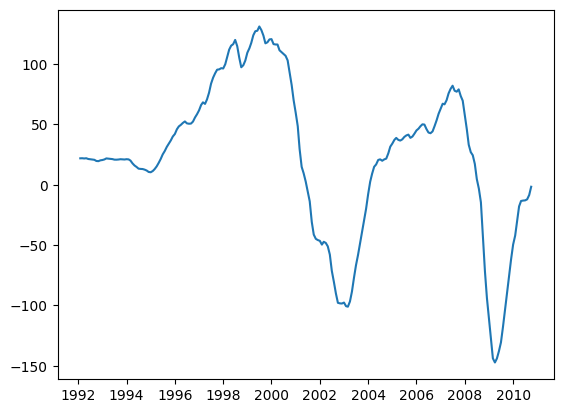

In [90]:
plt.plot(data['Date'], data['MACD'])

In [91]:
data = data.dropna()

In [92]:
data.columns

Index(['Date', 'EMA', 'MACD', 'MACD signal', 'MACD hist', 'RSI', 'bb_width',
       'bb_percent', 'RSI prediction', 'macd_cross_up', 'macd_cross_down',
       'macd prediction', 'next month', 'next dir', 'SP500', 'Dividend',
       'Earnings', 'Consumer Price Index', 'Long Interest Rate', 'Real Price',
       'Real Dividend', 'Real Earnings', 'PE10', 'change', 'CLI', 'DGORDER',
       'UMCSENT', 'UNRATE', 'VIX_Close'],
      dtype='object')

In [93]:
data.shape

(225, 29)

In [114]:
X = np.asarray(data[['MACD', 'MACD signal', 'MACD hist', 'RSI', 'bb_width',
       'bb_percent', 'RSI prediction', 'macd_cross_up', 'macd_cross_down', 'change', 'Consumer Price Index',
       'Long Interest Rate', 'PE10', 'CLI', 'DGORDER', 
       'UMCSENT', 'VIX_Close']])


y_c= np.asarray(data['next dir'])
y_r= np.asarray(data['next month'])


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, shuffle=False, test_size=0.2, random_state=0)
X_train__r, X_test__r, y_train__r, y_test_r = train_test_split(X, y_r, shuffle=False, test_size=0.2, random_state=0)

#training

LR = LogisticRegression().fit(X_train_c,y_train_c)
GB = GaussianNB().fit(X_train_c, y_train_c)
QB = QuadraticDiscriminantAnalysis().fit(X_train_c, y_train_c)
KNN = KNeighborsClassifier().fit(X_train_c, y_train_c)

LinR = LinearRegression().fit(X_train__r, y_train__r)
RF = RandomForestRegressor().fit(X_train__r, y_train__r)
GBR = GradientBoostingRegressor().fit(X_train__r, y_train__r)
SVM = SVR().fit(X_train__r, y_train__r)

#PREDICTION
yhatLR = LR.predict(X_test_c)
yhatGB = GB.predict(X_test_c)
yhatQB = QB.predict(X_test_c)
yhatKNN = KNN.predict(X_test_c)

yhatLinR = LinR.predict(X_test__r)
yhatRF = RF.predict(X_test__r)
yhatGBR = GBR.predict(X_test__r)
yhatSVM = SVM.predict(X_test__r)


# precision
print("---CLASSIFICATION PREDICTION")
print(f"Logistic regression: {accuracy_score(y_test_c, yhatLR)*100}%")
print(f"Naive Bayes: {accuracy_score(y_test_c, yhatGB)*100}%")
print(f"QDA: {accuracy_score(y_test_c, yhatQB)*100}%")
print(f"KNN: {accuracy_score(y_test_c, yhatKNN)*100}%")

c:\Users\vflip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\vflip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\vflip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.

---CLASSIFICATION PREDICTION
Logistic regression: 40.0%
Naive Bayes: 53.333333333333336%
QDA: 60.0%
KNN: 53.333333333333336%


In [115]:
from sklearn.metrics import mean_squared_error, r2_score

print("---REGRESSION PREDICTION")
print(f"Linear regression MSE: {mean_squared_error(y_test_r, yhatLinR)}")
print(f"Random Forest MSE: {mean_squared_error(y_test_r, yhatRF)}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test_r, yhatGBR)}")
print(f"SVM MSE: {mean_squared_error(y_test_r, yhatSVM)}")
print(f"\n\n")
print(f"Linear regression R2: {r2_score(y_test_r, yhatLinR)}")
print(f"Random Forest R2: {r2_score(y_test_r, yhatRF)}")
print(f"Gradient Boosting R2: {r2_score(y_test_r, yhatGBR)}")
print(f"SVM R2: {r2_score(y_test_r, yhatSVM)}")

---REGRESSION PREDICTION
Linear regression MSE: 0.005045725450497381
Random Forest MSE: 0.003145434455261476
Gradient Boosting MSE: 0.0030036172519004667
SVM MSE: 0.0036232449830725885



Linear regression R2: -0.7943643276807903
Random Forest R2: -0.11858154728234194
Gradient Boosting R2: -0.06814841665345228
SVM R2: -0.28850085321883023


In [108]:
def check_indiv(last):
    print("Data: \n", data.iloc[last])
    print("\nParam used: ", X[last])
    
    print("\n\nLR prediction: ", LR.predict_proba(X[[last]])*100, LR.predict([X[last]]))
    print("\nGB prediction: ", GB.predict_proba(X[[last]])*100, GB.predict([X[last]]))
    print("\nQDA prediction: ", QB.predict_proba(X[[last]])*100, QB.predict([X[last]]))
    print("\nKNN prediction: ", KNN.predict_proba(X[[last]])*100, KNN.predict([X[last]]))
    print("\n\n")
    print("\nLinR prediction: ", LinR.predict([X[last]]))
    print("\nRF prediction: ", RF.predict([X[last]]))
    print("\nGBR prediction: ", GBR.predict([X[last]]))
    print("\nSVM prediction: ", SVM.predict([X[last]]))
    print("\n\n")

check_indiv(-1)  # Check the last entry in the dataset

Data: 
 Date                    2010-10-01 00:00:00
EMA                             1111.047299
MACD                              -1.661613
MACD signal                      -21.495593
MACD hist                          19.83398
RSI                               56.015787
bb_width                          12.568172
bb_percent                          0.95035
RSI prediction                            0
macd_cross_up                         False
macd_cross_down                       False
macd prediction                           0
next month                          0.02331
next dir                                  1
SP500                               1171.58
Dividend                              22.48
Earnings                              73.69
Consumer Price Index                 218.71
Long Interest Rate                     2.54
Real Price                          1639.85
Real Dividend                         31.46
Real Earnings                        103.14
PE10                    